In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df1 = pd.read_csv("../Web-Scraping-Stats/cleaned_stats_data/player_stats_combined.csv", index_col=False)
df1.rename(columns={'X3P':'ThreeP', 'X3PA': 'ThreeP_Attempted', 'X3P.': 'ThreeP_Percentage', 'FG.': 'FG_Percentage', 'FT.': 'FT_Percentage'}, inplace=True)

df2 = pd.read_csv("../Web-Scraping-Player-Details/cleaned_player_details_data/combined_dataset.csv", index_col=False)
df2 = df2.drop(['Height_Feet', 'Height_Inch'], axis=1)
df2['NBA_Draft_Year'] = pd.to_numeric(df2['NBA_Draft_Year'], errors='coerce')
df2['NBA_Draft_Round'] = pd.to_numeric(df2['NBA_Draft_Round'], errors='coerce')
df2['NBA_Draft_Pick'] = pd.to_numeric(df2['NBA_Draft_Pick'], errors='coerce')

In [3]:
df1.select_dtypes(include='int').dropna()

,FG,FGA,ThreeP,ThreeP_Attempted,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,14,26,0,0,6,9,4,6,10,3,3,0,3,2,34,1980
1,11,16,0,0,0,0,1,0,1,7,6,0,2,2,22,1980
2,7,12,0,0,6,12,6,6,12,2,1,2,5,4,20,1980
3,4,12,0,0,3,4,2,3,5,2,2,1,2,5,11,1980
4,0,4,0,0,4,5,1,2,3,0,2,0,3,5,4,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,5,9,0,0,3,3,2,4,6,0,1,0,0,3,13,2010
711,7,14,1,3,0,0,1,4,5,0,0,0,2,0,15,2010
712,4,10,0,0,0,0,3,3,6,2,2,0,1,2,8,2010
713,2,4,0,0,0,0,2,1,3,1,0,0,1,0,4,2010


In [4]:
df1.select_dtypes(include='float').dropna()

,FG_Percentage,ThreeP_Percentage,FT_Percentage
14,0.625,0.000,1.000
17,0.571,0.000,0.833
29,0.714,0.000,0.500
42,0.400,0.000,1.000
57,0.474,0.000,1.000
...,...,...,...
691,0.455,0.167,1.000
692,0.750,0.000,0.667
693,0.700,0.500,0.667
703,0.591,0.250,0.000


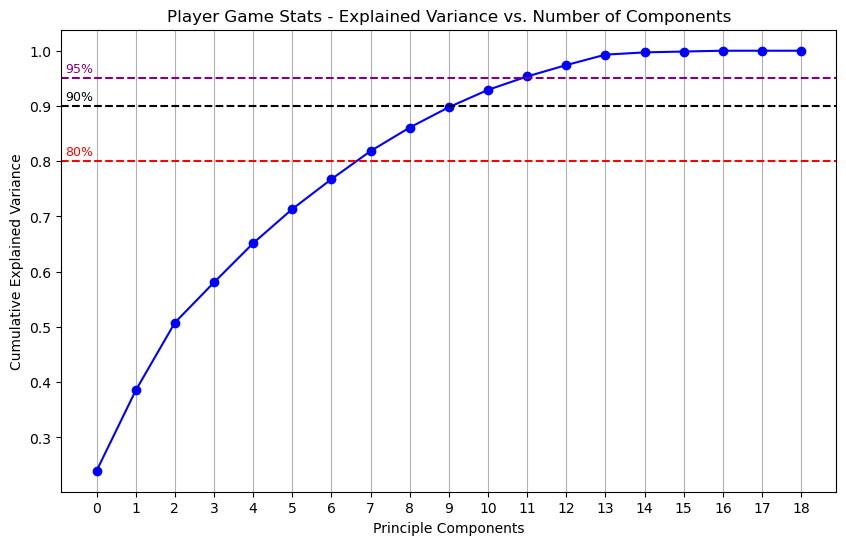


Loadings for Principal Component 0:
 PTS                  0.445741
FG                   0.416420
FGA                  0.391976
STL                  0.257220
FTA                  0.241261
FT                   0.237315
ThreeP               0.224264
FG_Percentage        0.220159
TOV                  0.192495
ThreeP_Attempted     0.188421
TRB                  0.176547
AST                  0.161185
ORB                  0.145503
DRB                  0.124320
ThreeP_Percentage    0.119775
PF                   0.094282
FT_Percentage        0.064108
BLK                  0.031432
Year                 0.012111
Name: 0, dtype: float64

Loadings for Principal Component 1:
 FT                   0.344087
TOV                  0.271034
FTA                  0.264274
PF                   0.225417
AST                  0.219666
FT_Percentage        0.206541
STL                  0.197750
ORB                  0.141633
BLK                  0.072079
TRB                  0.044178
DRB                 -0.035257


In [5]:
# Player Game Stats PCA
num_features = df1.select_dtypes(include=[np.number])
num_features = num_features.dropna()

scaler = StandardScaler()
num_features_scaled = scaler.fit_transform(num_features)

pca = PCA()
prin_comp = pca.fit_transform(num_features_scaled)

var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(var_ratio)

plt.figure(figsize=(10,6))
plt.plot(cumulative_var, marker='o', linestyle='-', color='b')
plt.xlabel('Principle Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Player Game Stats - Explained Variance vs. Number of Components')
plt.xticks(np.arange(0,19, step=1))
plt.axhline(y=0.95, color='purple', linestyle='--')
plt.text(-0.8, 0.96, '95%', color = 'purple', fontsize=9)
plt.axhline(y=0.90, color='black', linestyle='--')
plt.text(-0.8, 0.91, '90%', color = 'black', fontsize=9)
plt.axhline(y=0.80, color='red', linestyle='--')
plt.text(-0.8, 0.81, '80%', color = 'red', fontsize=9)
plt.grid(axis="x")
plt.savefig("../mysite/Stats-Components.png")
plt.show()

loadings = pd.DataFrame(pca.components_, columns=num_features.columns)

for i in range(len(loadings)):
    sorted_loadings = loadings.iloc[i, :].sort_values(ascending=False)
    print(f"\nLoadings for Principal Component {i}:\n", sorted_loadings)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# To have 80% of the variance explained, I need 8 principle components
# To have 90% of the variance explained, I need 11 principle components
# To have 95% of the variance explained, I need 12 principle components

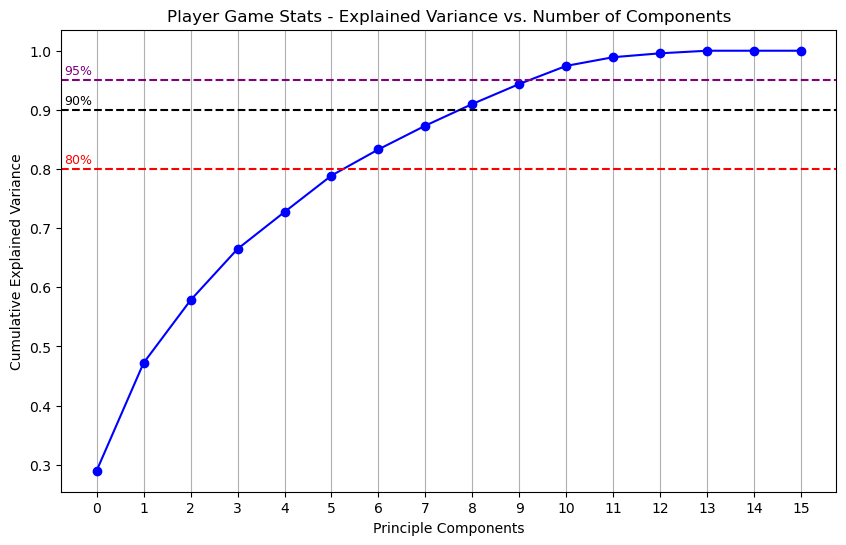


Loadings for Principal Component 0:
 PTS                 0.398886
FGA                 0.365398
FG                  0.364267
FTA                 0.312755
FT                  0.307688
TRB                 0.300343
DRB                 0.248360
ORB                 0.247564
PF                  0.221577
STL                 0.190093
TOV                 0.182622
BLK                 0.172407
AST                 0.107289
ThreeP              0.056945
ThreeP_Attempted    0.038207
Year               -0.067081
Name: 0, dtype: float64

Loadings for Principal Component 1:
 ThreeP_Attempted    0.470594
ThreeP              0.447765
AST                 0.242189
Year                0.213092
FGA                 0.211837
PTS                 0.205295
FG                  0.204614
STL                 0.193467
TOV                 0.099576
FT                 -0.088224
FTA                -0.114694
PF                 -0.181035
DRB                -0.225135
BLK                -0.238002
ORB                -0.241072
T

In [6]:
# Player Game Stats PCA -- integers
num_features = df1.select_dtypes(include='int')
num_features = num_features.dropna()

scaler = StandardScaler()
num_features_scaled = scaler.fit_transform(num_features)

pca = PCA()
prin_comp = pca.fit_transform(num_features_scaled)

var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(var_ratio)

plt.figure(figsize=(10,6))
plt.plot(cumulative_var, marker='o', linestyle='-', color='b')
plt.xlabel('Principle Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Player Game Stats - Explained Variance vs. Number of Components')
plt.xticks(np.arange(0,16, step=1))
plt.axhline(y=0.95, color='purple', linestyle='--')
plt.text(-0.7, 0.96, '95%', color = 'purple', fontsize=9)
plt.axhline(y=0.90, color='black', linestyle='--')
plt.text(-0.7, 0.91, '90%', color = 'black', fontsize=9)
plt.axhline(y=0.80, color='red', linestyle='--')
plt.text(-0.7, 0.81, '80%', color = 'red', fontsize=9)
plt.grid(axis="x")
plt.savefig("../mysite/Stats-Int-Components.png")
plt.show()

loadings = pd.DataFrame(pca.components_, columns=num_features.columns)

for i in range(len(loadings)):
    sorted_loadings = loadings.iloc[i, :].sort_values(ascending=False)
    print(f"\nLoadings for Principal Component {i}:\n", sorted_loadings)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# To have 80% of the variance explained, I need 7 principle components
# To have 90% of the variance explained, I need 9 principle components
# To have 95% of the variance explained, I need 11 principle components


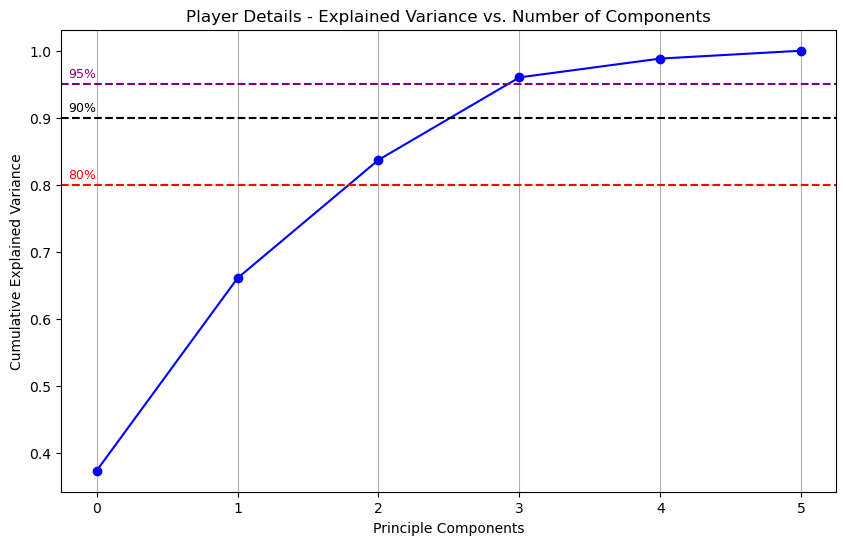


Loadings for Principal Component 0:
 Game_Year           0.547989
NBA_Draft_Year      0.546482
Weight              0.462264
Height_In_Inches    0.339669
NBA_Draft_Pick     -0.125801
NBA_Draft_Round    -0.237019
Name: 0, dtype: float64

Loadings for Principal Component 1:
 Height_In_Inches    0.595862
Weight              0.479240
NBA_Draft_Round     0.182096
NBA_Draft_Pick     -0.299467
Game_Year          -0.376013
NBA_Draft_Year     -0.388655
Name: 1, dtype: float64

Loadings for Principal Component 2:
 NBA_Draft_Pick      0.685076
NBA_Draft_Round     0.675674
Height_In_Inches    0.165149
Weight              0.145112
Game_Year           0.128167
NBA_Draft_Year      0.096839
Name: 2, dtype: float64

Loadings for Principal Component 3:
 NBA_Draft_Round     0.672570
Game_Year           0.193944
NBA_Draft_Year      0.181221
Weight             -0.150874
Height_In_Inches   -0.171281
NBA_Draft_Pick     -0.651992
Name: 3, dtype: float64

Loadings for Principal Component 4:
 Weight            

In [7]:
# Player Details PCA
num_features = df2.select_dtypes(include=[np.number])
num_features = num_features.dropna()

scaler = StandardScaler()
num_features_scaled = scaler.fit_transform(num_features)

pca = PCA()
prin_comp = pca.fit_transform(num_features_scaled)

var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(var_ratio)

plt.figure(figsize=(10,6))
plt.plot(cumulative_var, marker='o', linestyle='-', color='b')
plt.xlabel('Principle Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Player Details - Explained Variance vs. Number of Components')
plt.xticks(np.arange(0,6, step=1))
plt.axhline(y=0.95, color='purple', linestyle='--')
plt.text(-0.2, 0.96, '95%', color = 'purple', fontsize=9)
plt.axhline(y=0.90, color='black', linestyle='--')
plt.text(-0.2, 0.91, '90%', color = 'black', fontsize=9)
plt.axhline(y=0.80, color='red', linestyle='--')
plt.text(-0.2, 0.81, '80%', color = 'red', fontsize=9)
plt.grid(axis="x")
plt.savefig("../mysite/Details-Components.png")
plt.show()

loadings = pd.DataFrame(pca.components_, columns=num_features.columns)


for i in range(len(loadings)):
    sorted_loadings = loadings.iloc[i, :].sort_values(ascending=False)
    print(f"\nLoadings for Principal Component {i}:\n", sorted_loadings)


print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# To have 80% of the variance explained, I need 3 principle components
# To have 90% of the variance explained, I need 4 principle components
# To have 95% of the variance explained, I need 4 principle components

(160, 18)


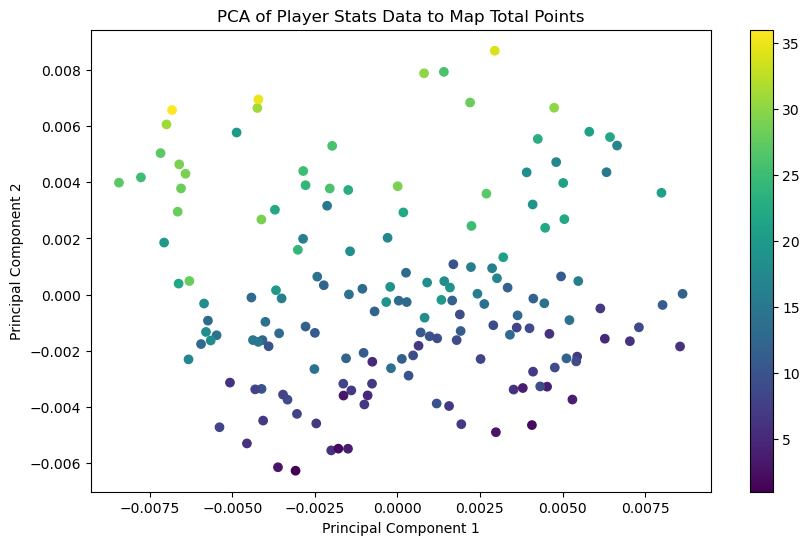

In [8]:
# Player Stats PCA visual
df1_features = df1.select_dtypes(include=np.number).dropna()
Y = df1_features['PTS']
X = df1_features.drop('PTS', axis=1)

print(X.shape)
X=X/np.max(X)
X1=pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X1[:,0], X1[:,1], c=Y, cmap='viridis')
plt.colorbar()
plt.title(f'PCA of Player Stats Data to Map Total Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig("../mysite/PCA-PS.png")
plt.show()

(715, 15)


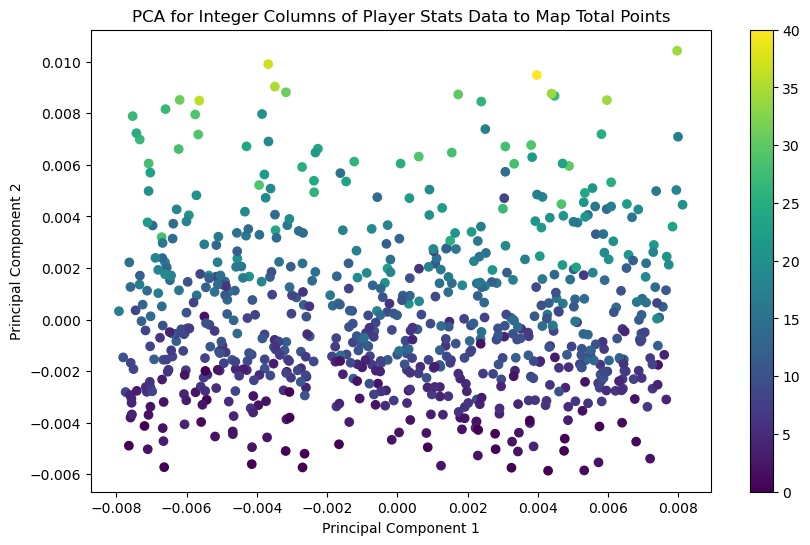

In [9]:
# Player Stats PCA visual 2
df1_features = df1.select_dtypes(include='int').dropna()
Y = df1_features['PTS']
X = df1_features.drop('PTS', axis=1)

print(X.shape)
X=X/np.max(X)
X1=pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X1[:,0], X1[:,1], c=Y, cmap='viridis')
plt.colorbar()
plt.title(f'PCA for Integer Columns of Player Stats Data to Map Total Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig("../mysite/PCA-Int.png")
plt.show()

(744, 5)


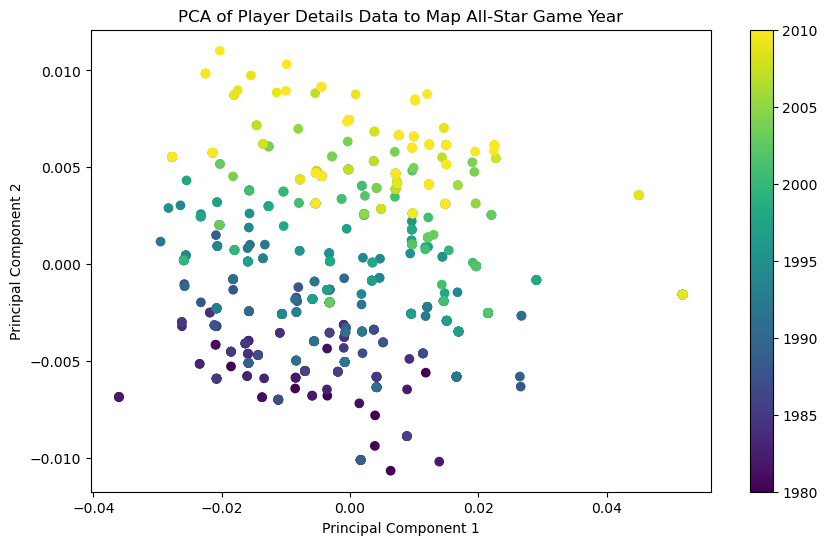

In [10]:
# Player Details PCA visual
df2_features = df2.select_dtypes(include=np.number).dropna()
Y = df2_features['Game_Year']
X = df2_features.drop('Game_Year', axis=1)

print(X.shape)
X=X/np.max(X)
X1=pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X1[:,0], X1[:,1], c=Y, cmap='viridis')
plt.colorbar()
plt.title(f'PCA of Player Details Data to Map All-Star Game Year')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig("../mysite/PCA-Details.png")
plt.show()

KL Divergence for Perplexity 5: 0.933
KL Divergence for Perplexity 10: 0.97
KL Divergence for Perplexity 20: 0.841
KL Divergence for Perplexity 30: 0.746
KL Divergence for Perplexity 40: 0.609
KL Divergence for Perplexity 50: 0.478


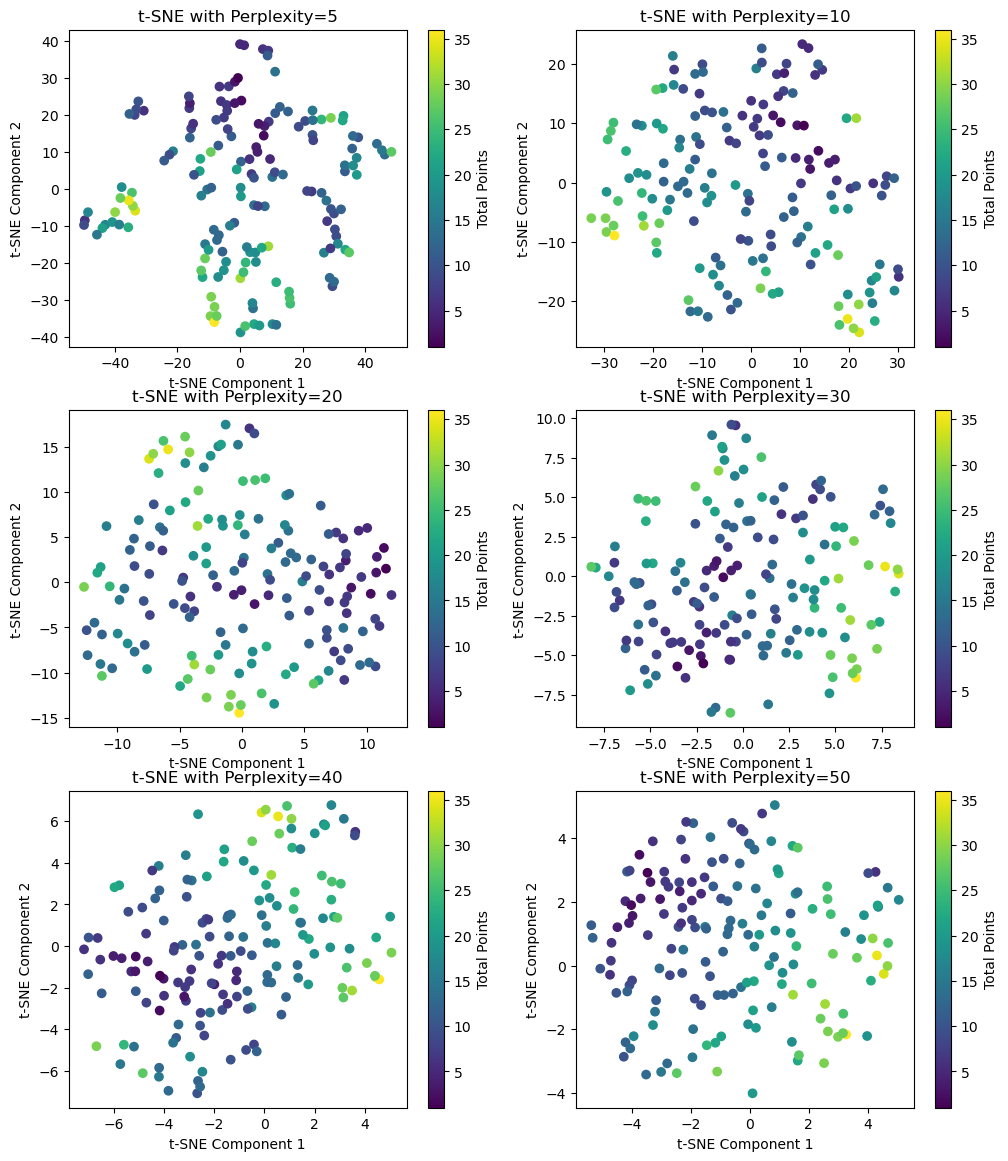

In [37]:
# Player Stats data -- t-SNE
selected_features = df1.select_dtypes(include=np.number).dropna()

Y = selected_features['PTS']
X = selected_features.drop('PTS', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

perplexities = [5, 10, 20, 30, 40, 50]

fig, axes = plt.subplots(3, 2, figsize=(12, 14), sharex=False, sharey=False)

for i, perplexity in enumerate(perplexities):
    row_index = i // 2
    col_index = i % 2

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    print(f'KL Divergence for Perplexity {perplexity}:', round(tsne.kl_divergence_, 3))

    scatter = axes[row_index, col_index].scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis')
    axes[row_index, col_index].set_title(f't-SNE with Perplexity={perplexity}')
    axes[row_index, col_index].set_xlabel('t-SNE Component 1')
    axes[row_index, col_index].set_ylabel('t-SNE Component 2')

    cbar = plt.colorbar(scatter, ax=axes[row_index, col_index])
    cbar.set_label('Total Points')

plt.savefig("../mysite/tSNE-Grid.png")
plt.show()

KL Divergence for Perplexity 5: 1.298
KL Divergence for Perplexity 10: 1.366
KL Divergence for Perplexity 20: 1.308
KL Divergence for Perplexity 30: 1.231
KL Divergence for Perplexity 40: 1.153
KL Divergence for Perplexity 50: 1.076


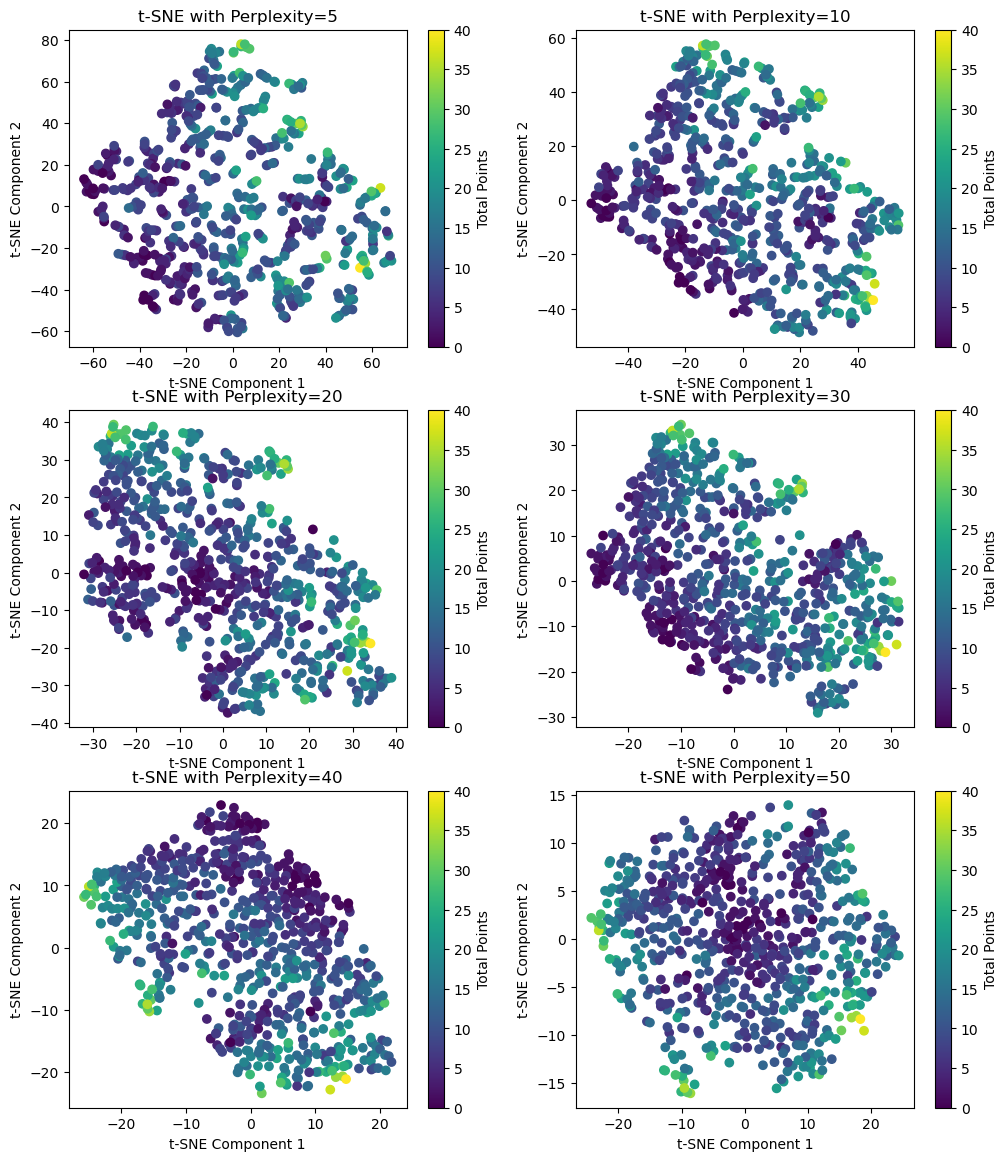

In [34]:
# Player Stats integer columns t-SNE
selected_features = df1.select_dtypes(include='int').dropna()

Y = selected_features['PTS']
X = selected_features.drop('PTS', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

perplexities = [5, 10, 20, 30, 40, 50]

fig, axes = plt.subplots(3, 2, figsize=(12, 14), sharex=False, sharey=False)

for i, perplexity in enumerate(perplexities):
    row_index = i // 2
    col_index = i % 2

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    print(f'KL Divergence for Perplexity {perplexity}:', round(tsne.kl_divergence_, 3))

    scatter = axes[row_index, col_index].scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis')
    axes[row_index, col_index].set_title(f't-SNE with Perplexity={perplexity}')
    axes[row_index, col_index].set_xlabel('t-SNE Component 1')
    axes[row_index, col_index].set_ylabel('t-SNE Component 2')

    cbar = plt.colorbar(scatter, ax=axes[row_index, col_index])
    cbar.set_label('Total Points')

plt.savefig("../mysite/tSNE-Int-Grid.png")
plt.show()

KL Divergence for Perplexity 5: -2.449
KL Divergence for Perplexity 10: -1.678
KL Divergence for Perplexity 20: -0.855
KL Divergence for Perplexity 30: -0.751
KL Divergence for Perplexity 40: -0.522
KL Divergence for Perplexity 50: -0.442


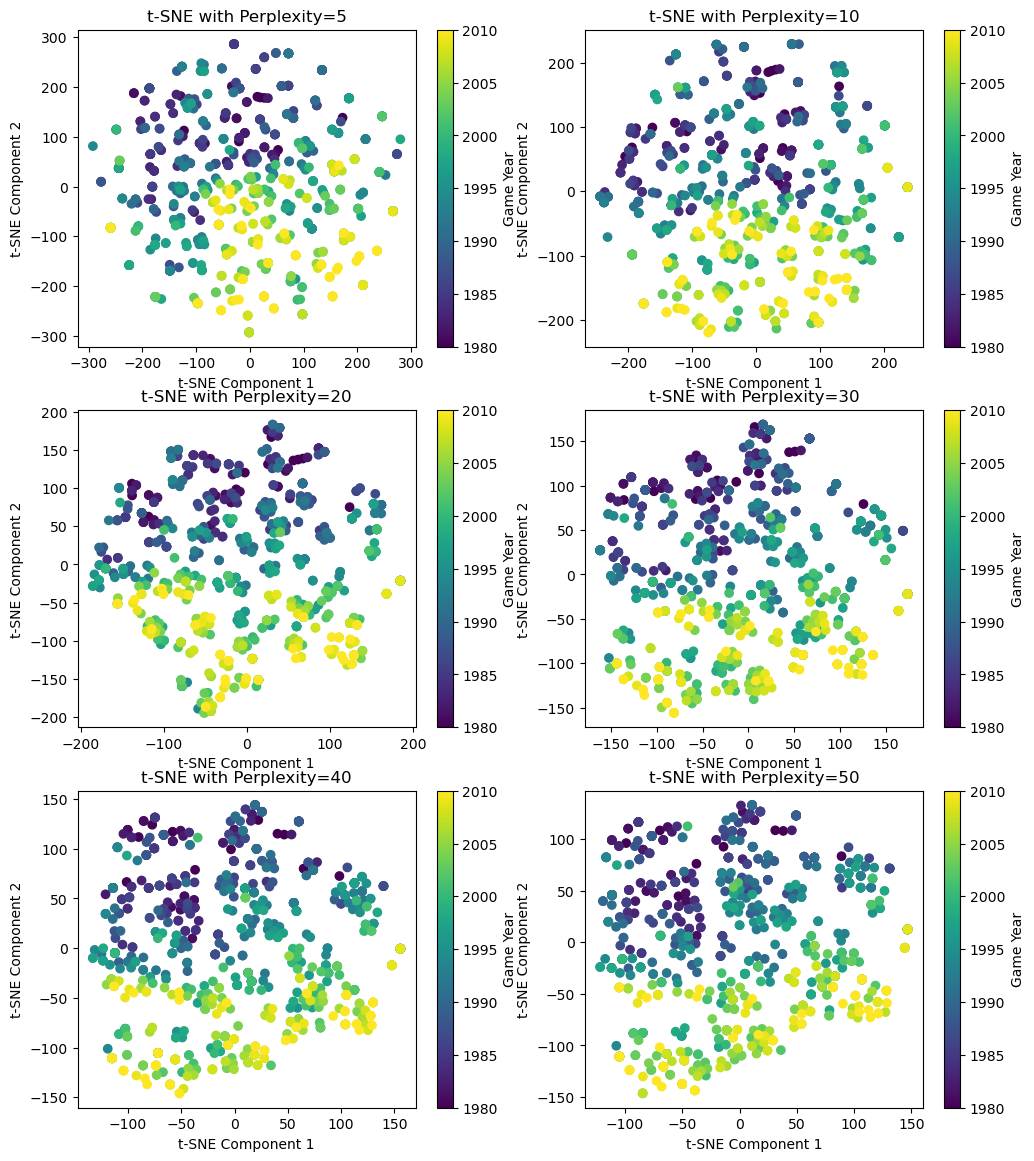

In [35]:
# Player Details t-SNE
selected_features = df2.select_dtypes(include=np.number).dropna()

Y = selected_features['Game_Year']
X = selected_features.drop('Game_Year', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

perplexities = [5, 10, 20, 30, 40, 50]

fig, axes = plt.subplots(3, 2, figsize=(12, 14), sharex=False, sharey=False)

for i, perplexity in enumerate(perplexities):
    row_index = i // 2
    col_index = i % 2

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    print(f'KL Divergence for Perplexity {perplexity}:', round(tsne.kl_divergence_, 3))

    scatter = axes[row_index, col_index].scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis')
    axes[row_index, col_index].set_title(f't-SNE with Perplexity={perplexity}')
    axes[row_index, col_index].set_xlabel('t-SNE Component 1')
    axes[row_index, col_index].set_ylabel('t-SNE Component 2')

    cbar = plt.colorbar(scatter, ax=axes[row_index, col_index])
    cbar.set_label('Game Year')

plt.savefig("../mysite/tSNE-Details-Grid.png")
plt.show()

In [40]:
df2.select_dtypes(include=np.number).dropna()

,Weight,Game_Year,Height_In_Inches,NBA_Draft_Year,NBA_Draft_Round,NBA_Draft_Pick
0,150,1980,73,1970.0,2.0,2.0
1,220,1980,81,1978.0,1.0,6.0
2,245,1980,85,1979.0,1.0,3.0
3,230,1980,81,1970.0,1.0,4.0
4,205,1980,78,1974.0,2.0,7.0
...,...,...,...,...,...,...
756,235,2010,79,1998.0,1.0,10.0
757,180,2010,73,2006.0,1.0,21.0
758,200,2010,75,2008.0,1.0,1.0
759,220,2010,76,2003.0,1.0,5.0
